# FIT5149 Assessment 2: Sentiment Classiﬁcation for Product Reviews

# Group Number : 36

# Group Members : Shiivong Kapil Birla (30046572), Rohan Chutke (28898362), Sohail Sankanur (29996368)

# Assignment Specification

## 1. Introduction to the Problem

- Sentiment analysis also known as opinion mining is a subﬁeld within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive or negative.

- For example, customer services, product analytics, market research etc. Take Ebay as an example: Customers on Ebay choose their preferred products based on the reviews from other users. an automatic sentiment classiﬁcation system can not only help companies grasp the satisfaction level of the products, but also signiﬁcantly assist new customers to locate their online shopping shelves.

- In this data analysis challenge, we are interested in developing such an automatic sentiment classiﬁcation system that relies on machine learning techniques to learn from a large set of product reviews provided by Yelp.

## 2. Aim 

- The aim of this challenge is to develop a sentiment classiﬁer that can assign a large set of product reviews to the ﬁve levels of polarity of opinion as accurately as possible, given a small amount of labeled reviews and a large amount of unlabelled reviews.

- It is a multi-class classiﬁcation task, where each product review is labeled with one of the ﬁve sentiment labels, which are strong negative, weak negative, neutral, weak positive, and strong positive.

## 3. Dataset 

- The dataset that is given for this challenge is of Yelp reviews. There are three datasets that have been provided.

1) `labeled_data.csv` : It contains 2 columns i.e; label and text. Label column gives the sentiment level and text column gives the yelp review in text format. It contains a total of 50000 reviews with 5 polarity levels.

2) `unlabeled_data.csv` : It contains only one column i.e; text. It contains a total of 600000 rows of product reviews with no polarity levels. 

3) `test_data.csv` : It contains two columns i.e.; test_id and text. The test_id gives us the test id of the text and the text gives us the reviews. It has 50,000 rows in total.

## 4. Our Approach

### 4.1 - Data Preparation and Extraction

- Firstly, we performed Exploratory Data Analysis (EDA) on our dataset, exploring the different attributes in our dataset by :

1) **Plotting bar graphs of the distribution of different labels.**

2) **Making Box-plots of text-lengths with their corressponding labels.**

3) **Building a WordCloud of top 100 words in our dataset.**


### 4.2 - Data Pre-Processing

We tried multiple approaches to pre-process the data, but none of them increased the accuracy as much as just **Lemmatization.** 

1) **Stopwords removal for the sake of making the WordCloud.**

2) **Lemmatization of the text for it to be treated as the model input.**

3) **Vectorization using TfidfVectorizer()** to form a tf-idf sparse matrix.

### 4.3 - Model Building

1) Neural Network - We have used Recurrent Neural Network for training our data and then using the test set to get the accuracy.

2) Multinomial Logistic Regression - We have used Multinomial Logistic Regression (because there are more than two target classes) as the second model, which surprisingly outperforms Neural Networks.

### 4.4 - Model Evaluation

1) Used the model object to predict labels on unlabeled test data.

2) Converted the predictions to a .csv file.

3) Uploaded the file to Kaggle for checking the accuracy on test data.

# Importing Libraries

- **pandas** : For reading and writing dataframes
- **nltk** : NLP computations in Python
- WordNetLemmatizer : Lemmetizing tokens
- wordnet - Lexical database for english to find meaning of words
- word_tokenize : Tokenizer uses Reguls Expressions to tokenize text as in Penn Treebank
- **sklearn** : ML library that provides simple and efficient tools for ML
- train_test_split : Split the dataset into training and test set
- LogisticRegression : For Multinomial Logistic Regression
- confusion_matrix, classification_report : Calculating confusion matrix and accuracy
- TfidfVectorizer : To vectorize the input into a tf-idf sparse matrix
- **matplotlib.pyplot** : To plot graphs
- **seaborn** : To use facet-grid
- **random** : To generate random integers
- WordCloud, STOPWORDS, ImageColorGenerator : For WordClouds in Python
- **keras** : It's an open-source neural network library which is capable of running on top of TensorFlow, Microsoft Cognitive tool-kit. It is a deep-learning framework for Python.

In [50]:
import pandas as pd 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet 
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt 
import seaborn
import scipy
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

# Reading the Dataset

- Reading in the dataset using `.read_csv()`

In [2]:
labeled_data = pd.read_csv('labeled_data.csv')

- Making a new column `text_length` to store the text length of each review using the `.map()`

In [3]:
labeled_data['text_length'] = labeled_data['text'].map(lambda text_length: len(text_length))

- Inspecting the dataframe using `.head()`

In [4]:
labeled_data.head()

,text,label,text_length
0,The new rule is - \r\nif you are waiting for a...,4,616
1,"Flirted with giving this two stars, but that's...",3,1124
2,I was staying at planet Hollywood across the s...,5,593
3,Food is good but prices are super expensive. ...,2,706
4,Worse company to deal with they do horrible wo...,1,630


# Exploratory Data Analysis

- Using the seaborn library, let's visualize the different **text lengths** with respect to **labels**.

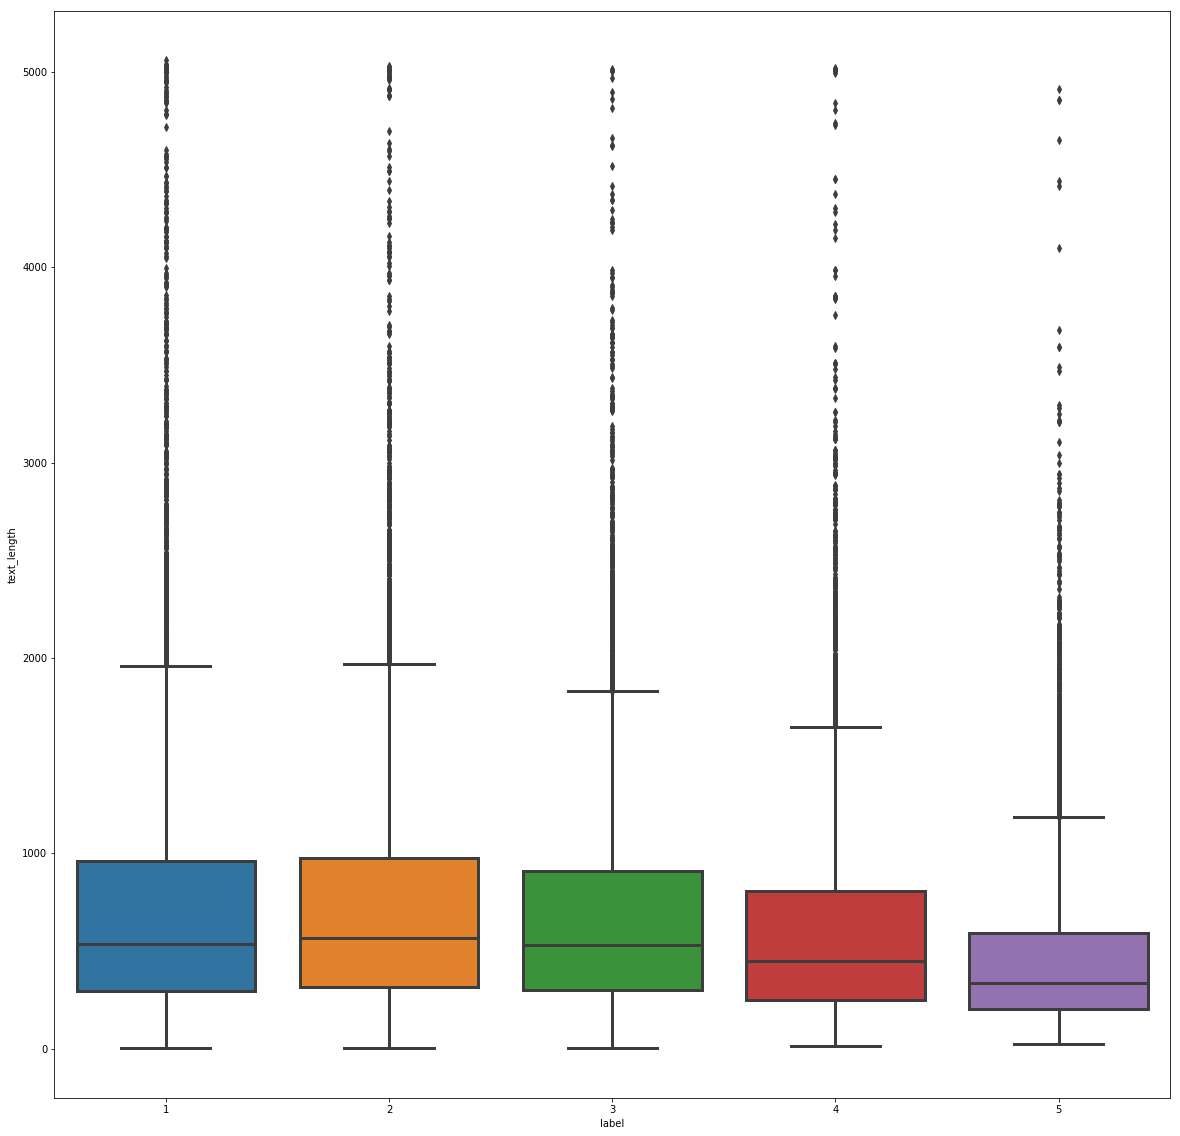

In [5]:
plt.figure(figsize=(20,20))

seaborn.boxplot(x = 'label', y = 'text_length', data = labeled_data, width = 0.8, linewidth = 3)

**Insight** : From the boxplot, there seems to be no visible differences in the text lengths of different labels in our dataset.

Now, let's plot the text lengths with different labels using a histogram to see it's spread.

<Figure size 1440x1440 with 0 Axes>

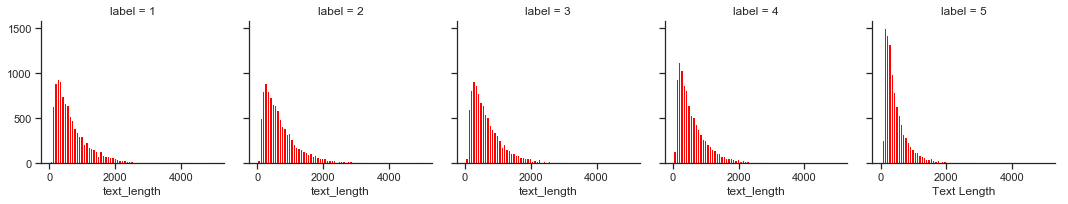

In [6]:
plt.figure(figsize=(20,20))

bin_width = 70

column = 'label'

color_palette = {'color' : ['red', 'blue', 'green', 'yellow', 'orange']}

seaborn.set(style = 'ticks')

facet_grid = seaborn.FacetGrid(data = labeled_data, col = column, hue_kws = color_palette)

facet_grid.map(plt.hist, 'text_length', bins = bin_width)

plt.xlabel('Text Length')

plt.show()

**Insight** : Every label is **right skewed**, some more than others. The distribution of label 5 is a little different from the others.

In [7]:
text = " ".join(review for review in labeled_data['text'])

print ("There are {} words in the combination of all review.".format(len(text)))

There are 33159244 words in the combination of all review.


Let's lay some groundwork for the WordCloud.

- Creating a set of stopwords

- Updating the stopwords set with more stopwords

In [8]:
stopwords = set(STOPWORDS)

stopwords.update(["one", "got", "restaurant", "well", "said", "even", "still", "place", "order", "know", \
                 "though", "go", "went", "think", "table", "really", "come", "now", "back", "inside", "asked", "thing", \
                 "told", "us", "something", "made", "came", "going"])

Using the set of stopwords to generate a WordCloud, excluding the stopwords.

In [9]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'black').generate(text)

Plotting the WordCloud using methods from matplotlib.

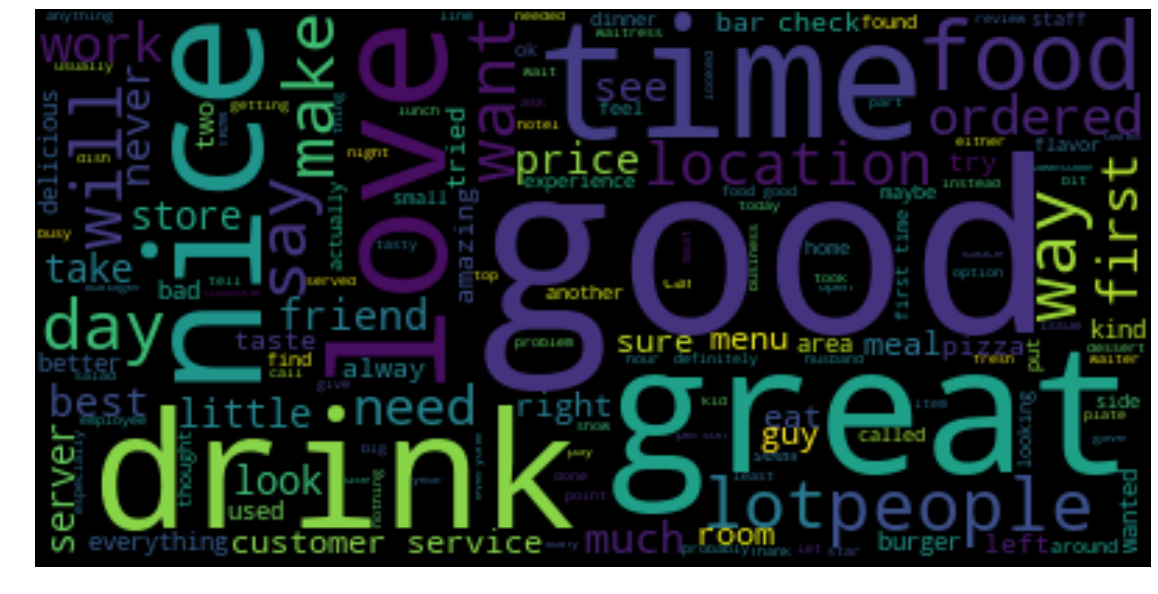

In [10]:
plt.figure(figsize=(20,20))

plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis("off")

plt.show()

**Insight** : The words which have a big font and are brighter are the most frequently used words in our dataset.

# Pre-Processing : Lemmatization

Lemmatization is a part of **nltk** library. It is a process of grouping together different forms of words for the purpose of analysing them as a single item. It is similar to **Stemming**, but it brings context to the words.Thus, it groups words and links them to a single word.

Below, we have defined a lemmatization class which initializes a `WordNetLemmatizer()` object as `WordNet`. It then iterates over all the words in a document and then lemmatizes them.

- The basic idea is to convert sentence into list of tuples.

In [11]:
class tokenizing_lemma(object):  
    
    def __init__(self):
        self.WordNet = WordNetLemmatizer()
    
    def __call__(self,doc):
        return [self.WordNet.lemmatize(word) for word in word_tokenize(doc)]

# tf-idf Vectorization

The sklearn library has an easy way to convert a text document into a tf-idf sparse matrix using the `TfidfVectorizer()` method. 

- **TF** stands for Term Frequency, which is nothing, for each unique word in the document, it gives the count of it's occurrence in the document.

- **DF** stands for Document Frequency which is nothing but the count of occurrence of that unique word in all the documents.

- We have also defined the range from unigrams to trigrams.

In [12]:
pattern = r'\S+'

maximum_features = 1000000

vectorized_transformer = TfidfVectorizer(tokenizer = tokenizing_lemma(),
                             
                             max_features = maximum_features,
                             
                             min_df = 2,
                             
                             max_df = 0.8,
                             
                             ngram_range = (1,3), 
                             
                             token_pattern = pattern)         

- Converting String to List
- TF-IDF sparse matrix formation

In [13]:
labeled_data_list = labeled_data['text'].tolist() 

labeled_data_vectorized = vectorized_transformer.fit_transform(labeled_data_list) 

Reference for LemmaTokenizer:

https://scikit-learn.org/stable/modules/feature_extraction.html

# Model Building

We have used the **train_test_split** function from the sklearn library to split our dataset into test and train data. The test size we have specified as **10%**. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(labeled_data_vectorized, labeled_data['label'], test_size = 0.10)

## Neural Networks

Neural Networks are nothing but a set of algorithms which are modeled loosely and their purpose is to recognize patterns in data. They interpret data through some kind of Machine Perception or a raw input. The design patterns that are recognized by Neural Nets are usually numerical which are present in the form of vectors be it images, audio, video etc. which is translated.

**Advantages of Neural Networks :**

- Have the ability with incomplete knowledge.

- Have high fault tolerance.

- They have a distributed memory and parallel processing capability.

**Disadvantages of Neural Networks :**

- Require good hardware for parallel processing.

- Predictions cannot be explained, the model interpretability is close to none.

- The duration of the network is undeterministic.



It helps us to cluster and classify by using some layers on top of data. In the code below, we have :

- Defined `Sequential()` form of layer embedding.
- Defined 10 layers for Input data.
- Defined 5 layers (6, because it's (0, 6]) Output layers as there are 5 output labels.
- Using the **relu** activation function in the input layer.
- Using the **sigmoid** function in the output layer.

In [15]:
input_dimension = X_train.shape[1] 

RNN = Sequential()

RNN.add(layers.Dense(10, input_dim = input_dimension, activation = 'relu'))

RNN.add(layers.Dense(6, activation = 'sigmoid'))

For compiling the model, we have made use of `sparse_categorical_crossentropy` **loss function**, `adam` as the **optimizer** and `accuracy` as the **metrics**.

In [16]:
RNN.compile(loss = 'sparse_categorical_crossentropy', 
            optimizer = 'adam', 
            metrics = ['accuracy'])

RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                9703290   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 9,703,356
Trainable params: 9,703,356
Non-trainable params: 0
_________________________________________________________________


Looking at the model summary, we can see that there are **9703290** parameters in the Input layer and **66** layers in the Output layer. Next, we fit our model to the training data `X_train` and `y_train` with just **one epoch, verbose as True, validation_data as X_test and y_test and lastly, batch_size as 10.**

In [17]:
RNN_model = RNN.fit(X_train, y_train,
                    
                    epochs = 1,
                    
                    verbose = True,
                    
                    validation_data = (X_test, y_test), 
                    
                    
                    batch_size = 10)

Train on 45000 samples, validate on 5000 samples
Epoch 1/1
45000/45000 [==============================] - 1030s 23ms/step - loss: 1.1368 - accuracy: 0.5420 - val_loss: 0.8852 - val_accuracy: 0.6284


In the above output we can see that there are **45000** training rows which are being tested against **5000** test data rows. The accuracy on the training data comes out to be **0.5420** and that of the test data to be **0.6284**. 

Even though this is a decent performance on the test set, the **training set accuracy is very bad**. And that is something to worry about, as it shows that the testing accuracy is not a reliable input.

## Multinomial Logistic Regression

Multinomial Logistic Regression is used for prediction of categorical variables of a dependent variable based on multiple independent variables. It is nothing but an extension of simple binary logistic regression that allows for more than two categories.

The technique used by Multinomial Logistic Regression is **Maximum Likelihood Estimate** (MLE) to evaluate the **probability** of each category. In the sklearn library, a LogisticRegression class can be made use of. 

Here, we have made use of the `liblinear` **solver** function and `ovr` as the **multi_class** parameter for multiple classes. That is then `fit` to the training data and used the `.predict()` method to get the predictions.

**Advantages of Logistic Regression :**

- Does not require a lot of computational resources.

- Highly interpretable.

- Does not require much tuning, easy to regularize.

**Disadvantages of Logistic Regression :**

- Cannot solve non-linear problems since it's decision surface is linear.

- Can be easily outperformed by more complex models. 

- Vulnerable to Overfitting.

In [19]:
LogReg_model = LogisticRegression(random_state = 1, solver = 'liblinear', multi_class = 'ovr').fit(X_train, y_train)

In [20]:
LogReg_pred = LogReg_model.predict(X_test)

Below, is the confusion matrix for our model predictions.

In [21]:
print(confusion_matrix(y_test, LogReg_pred))

[[771 181  26   3  12]
 [273 489 182  24  15]
 [ 67 182 510 182  39]
 [ 30  32 182 539 254]
 [ 23   7  21 206 750]]


The below peice of code gives us the classification report which tells us about the **precision, recall, f1-score and support** metrics all in one table. 

In [55]:
print(classification_report(y_test, LogReg_pred))

              precision    recall  f1-score   support

           1       0.66      0.78      0.71       993
           2       0.55      0.50      0.52       983
           3       0.55      0.52      0.54       980
           4       0.56      0.52      0.54      1037
           5       0.70      0.74      0.72      1007

   micro avg       0.61      0.61      0.61      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.61      0.61      5000



In [23]:
print('The Accuracy for the Logistic Regression model is: ' + str(metrics.accuracy_score(y_test,LogReg_pred)))

The Accuracy for the Logistic Regression model is: 0.6118


## Support Vector Machine

Support Vector Machines can be used to do both Classification and Regression. For Classification, it makes use of a non-probabilistic linear classifier. The algorithm produces many linear classifiers, also known as **hyperplanes** to distinguish boundaries between clusters of points. It is extremely useful in text and hypertext catergorization, image classification and permutation tests.

**Advantages of SVM :**

- Works very well when there are clear margin of separation between classes.

- More effective in higher dimensions.

- SVM is memory efficient.

**Disadvantages of SVM :**

- Not suitable for large datasets.

- Does not perform well when there is more noise in the data.

- There is no probabalistic explaination for classification as SVM puts data points above and below the classifying hyperplane.

In [58]:
SVM_model = LinearSVC(multi_class = 'ovr')

Let us now fit the SVM model using the `.fit()`.

In [59]:
SVM_fit = SVM_model.fit(X_train, y_train)

Let's predict the labels using the `.predict()` method.

In [60]:
SVM_pred = SVM_model.predict(X_test)

Taking a close look at the confusion matrix.

In [61]:
print(confusion_matrix(y_test, SVM_pred))

[[766 175  37   3  12]
 [272 474 198  22  17]
 [ 66 207 464 205  38]
 [ 17  39 181 521 279]
 [ 15  12  25 213 742]]


Printing out the classification report.

In [62]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           1       0.67      0.77      0.72       993
           2       0.52      0.48      0.50       983
           3       0.51      0.47      0.49       980
           4       0.54      0.50      0.52      1037
           5       0.68      0.74      0.71      1007

   micro avg       0.59      0.59      0.59      5000
   macro avg       0.59      0.59      0.59      5000
weighted avg       0.59      0.59      0.59      5000



In [63]:
print('The Accuracy for the Support Vector MAchine model is: ' + str(metrics.accuracy_score(y_test, SVM_pred)))

The Accuracy for the Support Vector MAchine model is: 0.5934


Close to what we got for Logistic Regression! But I don't believe that we can go with this model, as Logistic Regression is faster and it is giving a better prediction rate by almost 2%. 

## Model Conclusion 

***Even though the Neural Net tets accuracy is a bit better, we would still use the `Logistic Regression` for our final model preparation and prediction because of two important criteria.***

- Model Interpretebility : Neural Networks usually are not explainable as they take unknown paths in the layers, hence we cannot interpret the results even though it may give slightly better results. Logistic Regression is easily interpretable as it outputs label probabilities instead of just predicting the labels itself.


- Computation Time : With 650,000 rows of data, Neural Networks will take forever to even run one epoch. On the other hand, Logistic Regression takes almost 1/10th the time.

# Final Model with Unlabeled Data

- Reading in the dataset using `.read_csv()`

In [24]:
unlabeled_data = pd.read_csv('unlabeled_data.csv')

- Converting String to List
- TF-IDF sparse matrix formation

In [25]:
unlabeled_data_list = unlabeled_data['text'].tolist() 

unlabeled_data_vectorized = vectorized_transformer.transform(unlabeled_data_list) 

- Using the `.predict()` method to predict the labels of the unlabeled data using the previously used Logistic Regression model, so that we can combine the two datasets (labeled + unlabeled) to form our new training set. 

In [26]:
unlabeled_data['label']  = LogReg_model.predict(unlabeled_data_vectorized)

Making use of the **scipy** library, we make use of the `.vstack()` method we combine the two training datasets into one. We do this in two separate tasks.

- Combining all the text data from the labeled and unlabeled data.
- Combining all the labels from the labeled and unlabeled data.

In [27]:
training_text = scipy.sparse.vstack((X_train, unlabeled_data_vectorized))

In [28]:
training_label = pd.concat([y_train.to_frame(), unlabeled_data['label'].to_frame()]).reset_index()['label']

Next, we run the Multinomial Logistic Regression algorithm on the whole training dataset.

In [38]:
LogReg_model_full = LogisticRegression(random_state = 1, solver = 'liblinear', multi_class = 'ovr')\
.fit(training_text, training_label)

Now, we will read in the test data which we have been provided with.

In [30]:
test_data = pd.read_csv('test_data.csv')

- Converting String to List
- TF-IDF sparse matrix formation

In [31]:
test_data_list = test_data['text'].tolist() 

test_data_vectorized = vectorized_transformer.transform(test_data_list) 

Using the Logistic Regression model we defined above, we will predict on the test data.

In [43]:
test_data['label'] = LogReg_model_full.predict(test_data_vectorized)

# Writing Predictions to File

We use the `.to_csv()` method to write to a file. 

In [64]:
file_path = 'predict_label.csv'

In [65]:
test_data[['test_id','label']].to_csv(file_path, index = False)